In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt


In [3]:
train=pd.read_csv('train.csv')


# **Làm sạch và chuẩn hóa trên tập train**

In [4]:
train

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


| **Tên cột tiếng Anh**   | **Tên tiếng Việt**                           | **Ghi chú**                                                           |
| ----------------------- | --------------------------------------------------------- | --------------------------------------------------------------------- |
| `Id`                    | Mã hồ sơ                                                  | Mã định danh duy nhất cho mỗi khách hàng                              |
| `Product_Info_1-7`      | Thông tin sản phẩm bảo hiểm (1–7)                         | Các đặc trưng về sản phẩm bảo hiểm đăng ký                            |
| `Ins_Age`               | Tuổi được chuẩn hóa của người được bảo hiểm               | Tuổi, đã được chuẩn hóa (normalized)                                  |
| `Ht`                    | Chiều cao đã chuẩn hóa                                    |                                                                       |
| `Wt`                    | Cân nặng đã chuẩn hóa                                     |                                                                       |
| `BMI`                   | Chỉ số khối cơ thể đã chuẩn hóa                           | Body Mass Index                                                       |
| `Employment_Info_1-6`   | Thông tin nghề nghiệp của người được bảo hiểm (1–6)       | Gồm các đặc trưng như thu nhập, thời gian làm việc, v.v.              |
| `InsuredInfo_1-6`       | Thông tin cá nhân tổng quát của người được bảo hiểm (1–6) | Có thể bao gồm thói quen sinh hoạt, tình trạng hôn nhân,...           |
| `Insurance_History_1-9` | Lịch sử bảo hiểm của khách hàng (1–9)                     | Bao gồm các thông tin như: đã từng bị từ chối, số năm có hợp đồng,... |
| `Family_Hist_1-5`       | Lịch sử bệnh tật trong gia đình (1–5)                     | Bệnh lý di truyền hoặc người thân mắc bệnh                            |
| `Medical_History_1-41`  | Lịch sử y tế của khách hàng (1–41)                        | Có thể bao gồm thông tin khám chữa bệnh, tiền sử bệnh                 |
| `Medical_Keyword_1-48`  | Từ khóa y tế (1–48)                                       | Các biến nhị phân biểu thị sự hiện diện của từ khóa y tế              |
| `Response`              | Mức độ rủi ro (biến mục tiêu)                             | Giá trị từ 1 đến 8, càng cao có thể càng rủi ro                       |


In [6]:
from sklearn.preprocessing import LabelEncoder
obj_data = list(train.select_dtypes(include=['object']).columns)
le = LabelEncoder()
# Chuyển các cột kiểu object thành số
train[obj_data] = train[obj_data].apply(le.fit_transform)

In [7]:
dt=train.copy()
dt

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,14,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,16,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,18,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,15,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


In [8]:
data_miss = train.isnull().sum()
tyLe = (data_miss / len(train)) * 100
missing_df = pd.DataFrame({
    'số lượng': data_miss,
    'phần trăm': tyLe,
    })
missing_df = missing_df[missing_df['số lượng'] > 0]
missing_df.sort_values(by='phần trăm', ascending=False)


,số lượng,phần trăm
Medical_History_10,58824,99.061990
Medical_History_32,58274,98.135767
Medical_History_24,55580,93.598963
Medical_History_15,44596,75.101463
Family_Hist_5,41811,70.411411
Family_Hist_3,34241,57.663226
Family_Hist_2,28656,48.257860
Insurance_History_5,25396,42.767889
Family_Hist_4,19184,32.306630
Employment_Info_6,10854,18.278574


có thể thấy 6 cột bị thiếu hơn 50% dữ liệu trong cột đó => xóa đi

In [9]:
dt = train.loc[:, train.isnull().mean() <= 0.5].copy()

In [10]:
dt

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,14,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,16,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,18,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,15,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


In [11]:
cot_can_them = ['Family_Hist_2', 'Insurance_History_5','Family_Hist_4','Employment_Info_6'	,'Medical_History_1'	,'Employment_Info_4'	,'Employment_Info_1']
dt[cot_can_them] = dt[cot_can_them].fillna(dt[cot_can_them].mean())
print(dt)

          Id  Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0          2               1              16              10        0.076923   
1          5               1               0              26        0.076923   
2          6               1              18              26        0.076923   
3          7               1              17              10        0.487179   
4          8               1              15              26        0.230769   
...      ...             ...             ...             ...             ...   
59376  79142               1              14              10        0.230769   
59377  79143               1              16              26        0.230769   
59378  79144               1              18              26        0.076923   
59379  79145               1              15              10        0.230769   
59380  79146               1               7              26        0.076923   

       Product_Info_5  Product_Info_6  

In [12]:
# Kiểm tra giá trị khuyết thiếu
dt.isna().sum()

Id                    0
Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 122, dtype: int64

In [13]:
dt

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,14,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,16,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,18,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,15,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


**phân loại nhị phân trên tập train**

In [33]:
# Định nghĩa hàm ánh xạ (nếu chưa có)
def map_binary_response(response):
    if response in [1, 2, 3, 4, 5,6]:
        return 0
    else:  # response == 7/8
        return 1

# Áp dụng lên tập test
dt['Binary_Response'] = dt['Response'].apply(map_binary_response)

In [34]:
counts = dt['Binary_Response'].value_counts()
print(counts)


0    31865
1    27516
Name: Binary_Response, dtype: int64


In [35]:
print("Phân phối lớp ban đầu (theo tỷ lệ phần trăm):")
print((dt['Binary_Response'].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

Phân phối lớp ban đầu (theo tỷ lệ phần trăm):
0    53.66%
1    46.34%
Name: Binary_Response, dtype: object


In [36]:
X = dt.drop(columns=['Response', 'Binary_Response'])
y = dt['Binary_Response']

In [38]:
a = dt['Binary_Response'].value_counts(normalize=True)
b = pd.DataFrame({
    'Lớp': ['Phản hồi 1–6 (0)', 'Phản hồi 7-8 (1)'],
    'Tỷ lệ phần trăm': a.values
})

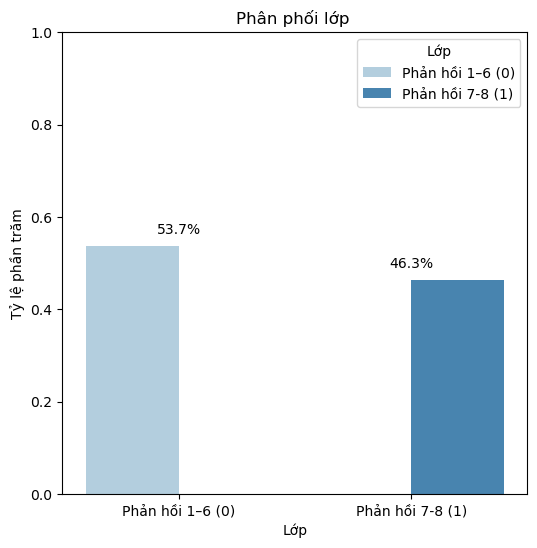

In [39]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.barplot(x='Lớp', y='Tỷ lệ phần trăm', data=b, hue='Lớp', palette='Blues')
plt.title('Phân phối lớp ')
plt.xlabel('Lớp')
plt.ylabel('Tỷ lệ phần trăm')
plt.ylim(0, 1)
# Hiển thị giá trị phần trăm trên mỗi cột
for i, v in enumerate(b['Tỷ lệ phần trăm']):
    plt.text(i, v + 0.02, f"{v * 100:.1f}%", ha='center', va='bottom')

plt.savefig('phan_phoi_cac_lop.png')
plt.show()

In [21]:
can_nang =dt['Wt']
cn = can_nang[can_nang > 0]
cn

0        0.148536
1        0.131799
2        0.288703
3        0.205021
4        0.234310
           ...   
59376    0.320084
59377    0.403766
59378    0.246862
59379    0.276151
59380    0.382845
Name: Wt, Length: 59380, dtype: float64

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Tải dữ liệu (ví dụ, từ một file CSV)
data = dt
print(dt.columns)


Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43',
       'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46',
       'Medical_Keyword_47', 'Medical_Keyword_48', 'Response',
       'Binary_Response'],
      dtype='object', length=123)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3)


In [42]:
# chuan hoa
from sklearn.preprocessing import StandardScaler
chuanHoa = StandardScaler()
X_train_ch = chuanHoa.fit_transform(X_train)
X_test_ch = chuanHoa.transform(X_test)

In [43]:
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
rf_temp.fit(X_train_ch, y_train)
#n_estimators=100: mô hình sẽ tạo 100 cây quyết định. Mỗi cây học một phần khác nhau của dữ liệu. Dự đoán cuối cùng là bỏ phiếu số đông từ tất cả cây.

RandomForestClassifier(n_jobs=1, random_state=42)

In [44]:
feature_importances = rf_temp.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
}).sort_values("importance", ascending=False)

# Lọc 20 cột quan trọng nhất
best_features = importances_df.head(20)["feature"].tolist()

#Tạo dữ liệu mới chỉ gồm các cột quan trọng và cột mục tiêu
new_data = dt[best_features + ['Binary_Response']]

# In kết quả
print(best_features)

['BMI', 'Wt', 'Medical_History_4', 'Product_Info_4', 'Ins_Age', 'Id', 'Employment_Info_1', 'Medical_History_1', 'Family_Hist_4', 'Ht', 'Medical_History_2', 'Employment_Info_6', 'Product_Info_2', 'Family_Hist_2', 'Insurance_History_5', 'InsuredInfo_3', 'Medical_History_23', 'Medical_Keyword_3', 'Employment_Info_2', 'Medical_History_39']


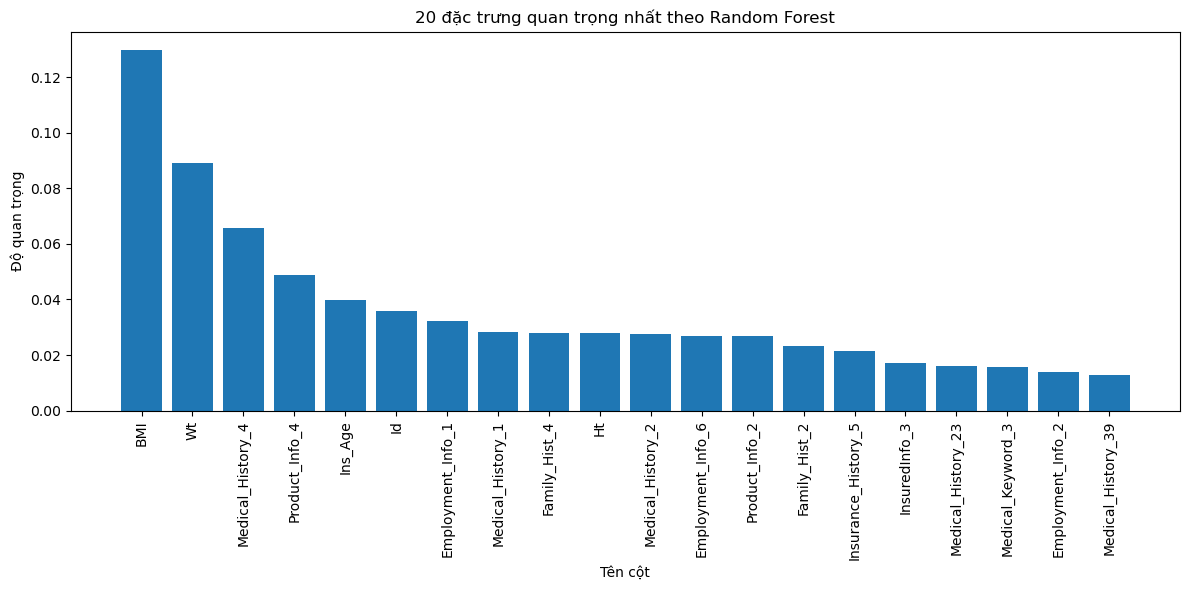

In [45]:
#Vẽ biểu đồ trực quan
plt.figure(figsize=(12, 6))
plt.bar(range(len(best_features)), importances_df.head(20)["importance"])
plt.xticks(range(len(best_features)), best_features, rotation=90)
plt.xlabel("Tên cột")
plt.ylabel("Độ quan trọng")
plt.title("20 đặc trưng quan trọng nhất theo Random Forest")
plt.tight_layout()
plt.show()


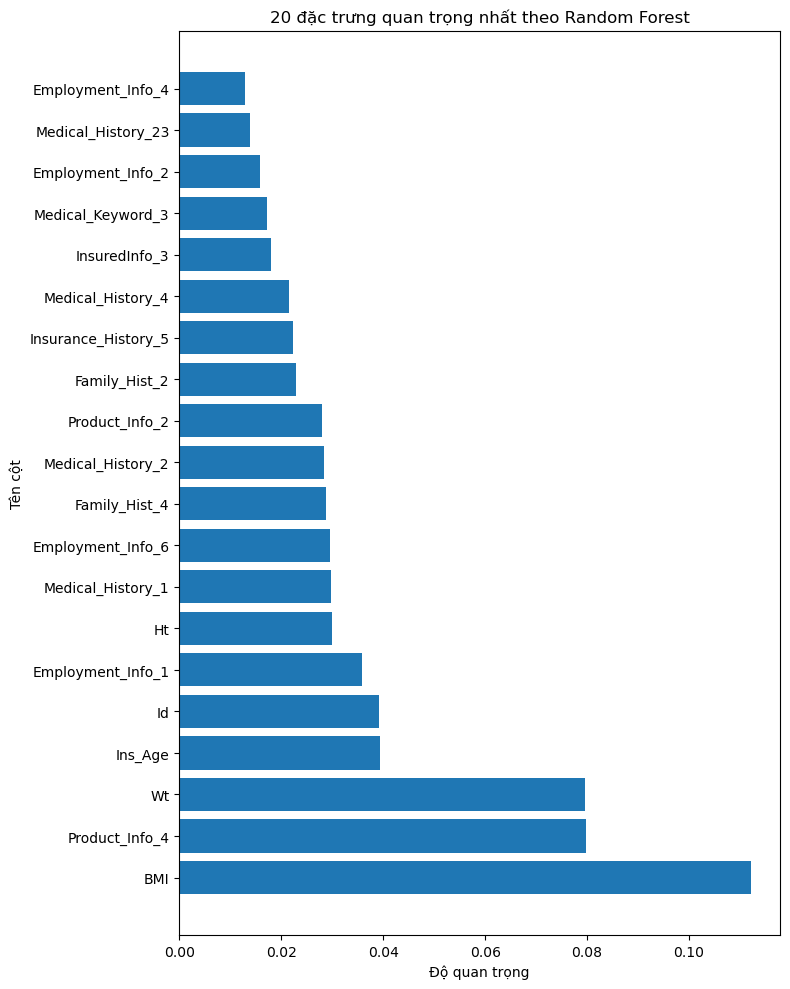

In [28]:
plt.figure(figsize=(8, 10))
plt.barh(best_features, importances_df.head(20)["importance"])
plt.xlabel("Độ quan trọng")
plt.ylabel("Tên cột")
plt.title("20 đặc trưng quan trọng nhất theo Random Forest")
plt.tight_layout()
plt.show()


Feature Importance từ mô hình  Random Forest:

+ Là điểm số thể hiện mức độ đóng góp của từng biến vào việc phân chia dữ liệu trong cây, tức biến đó giúp cải thiện độ chính xác mô hình như thế nào.

+ Giá trị này thường được chuẩn hóa, có thể hiểu như phần trăm ảnh hưởng.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
selected_features = ['BMI', 'Wt', 'Medical_History_4', 'Product_Info_4', 'Ins_Age', 'Id',
                     'Employment_Info_1', 'Family_Hist_4', 'Ht', 'Product_Info_2',
                     'Medical_History_1', 'Employment_Info_6', 'Medical_History_2',
                     'Family_Hist_2', 'Insurance_History_5', 'InsuredInfo_3',
                     'Medical_History_23', 'Medical_Keyword_3', 'Employment_Info_2',
                     'Medical_History_39']
X_moi = dt[selected_features]
y_moi= dt['Binary_Response']

# 1. Chia dữ liệu
X_train_moi, X_test_moi, y_train_moi, y_test_moi = train_test_split(X_moi, y_moi, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_moi)
X_test_scaled = scaler.transform(X_test_moi)

In [47]:
# 2. Huấn luyện mô hình Random Forest
# Khởi tạo mô hình với các tham số mặc định hoặc sơ bộ
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_moi)

RandomForestClassifier(random_state=42)

In [51]:
# 3. Đánh giá mô hình (trước khi tinh chỉnh)
y_pred = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test_moi, y_pred))
print("Classification Report:\n", classification_report(y_test_moi, y_pred))
# Dự đoán xác suất lớp 1 (positive)
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]  # X_test_scaled đã chuẩn hóa

# Tính AUC
auc_score = roc_auc_score(y_test_moi, y_probs)
print("AUC Score:", auc_score)

Accuracy: 0.7833847880999159
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      9611
           1       0.76      0.78      0.77      8204

    accuracy                           0.78     17815
   macro avg       0.78      0.78      0.78     17815
weighted avg       0.78      0.78      0.78     17815

AUC Score: 0.8619684696162943


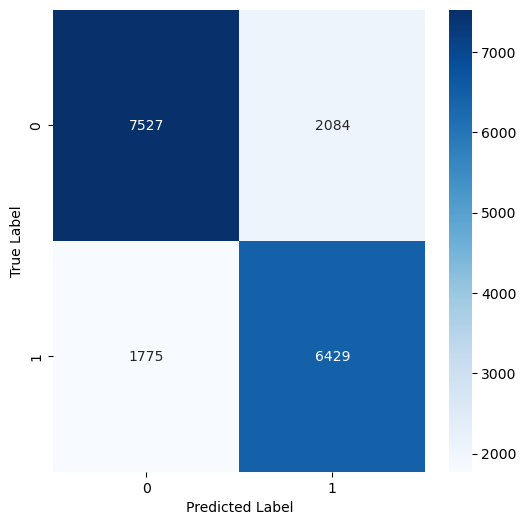

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ma_tran=confusion_matrix(y_test_moi,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(ma_tran, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
# Trích xuất TN, FP, FN, TP
tn, fp, fn, tp = ma_tran.ravel()

# In các chỉ số
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")


True Negative (TN): 7527
False Positive (FP): 2084
False Negative (FN): 1775
True Positive (TP): 6429


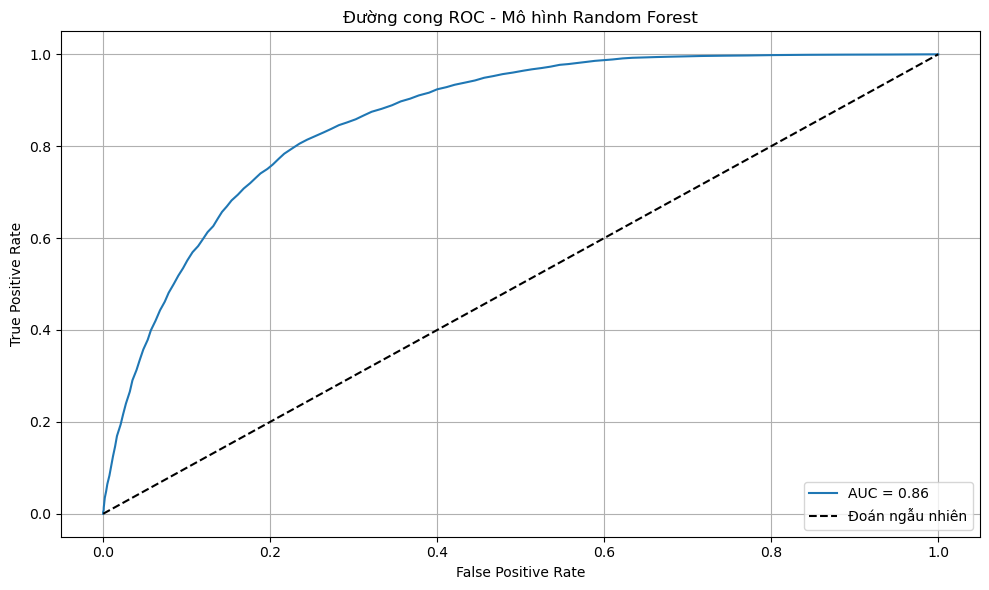

In [54]:
from sklearn.metrics import roc_curve

# Tính FPR (tỷ lệ âm tính giả), TPR (tỷ lệ dương tính thật) và các ngưỡng tương ứng
fpr, tpr, thresholds = roc_curve(y_test_moi, y_probs)

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Đoán ngẫu nhiên')  # Đường chéo cho mô hình không phân biệt được

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Đường cong ROC - Mô hình Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
